<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
df_1.head(2)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.22117,105.280062
1,2acmU,1.334711,-0.340164,4.36508,73.037750


In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
def exploratory(data):
    print(f"Shape:    {data.shape}")
    print("Na's:         ", data.isna().sum().sum())
    print("duplicates:   ", data.duplicated().sum())
    print("\nРаспределение признаков:")
    data[["f0","f1","f2"]].hist()
    plt.show()

Shape:    (100000, 5)
Na's:          0
duplicates:    0

Распределение признаков:


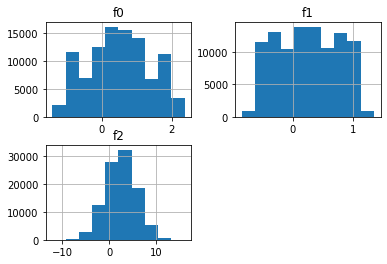

In [8]:
exploratory(df_1)

Shape:    (100000, 5)
Na's:          0
duplicates:    0

Распределение признаков:


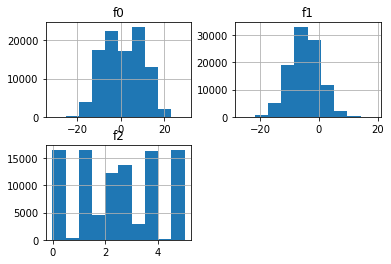

In [9]:
exploratory(df_2)

Shape:    (100000, 5)
Na's:          0
duplicates:    0

Распределение признаков:


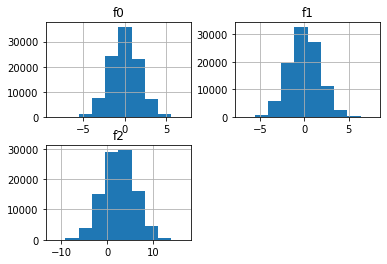

In [10]:
exploratory(df_3)

В данных отсутсвуют пропуски

Признаки для модели:

- f0
- f1
- f2

Целевой признак:

- product.

Изучим гистограммы по столбцу product:

In [11]:
def oil_hist(seria, bins, xlim_max, ylim_max):
    plt.figure(figsize=[12,9])
    plt.hist(seria, bins=bins)
    plt.xlim([0,xlim_max])
    plt.ylim([0,ylim_max])
    plt.xlabel("Объем нефти на скважину, тыс. барелей")
    plt.ylabel("Количество скважин")
    plt.title("Гистограмма распределения по объему скважин")
    plt.show()

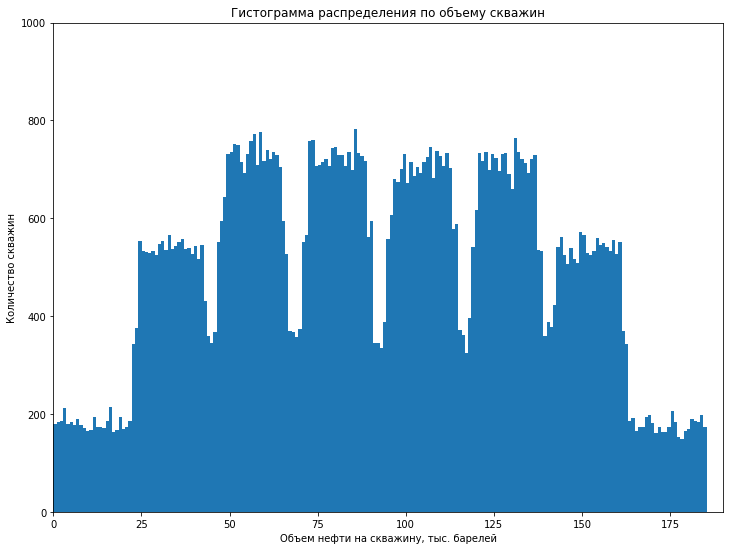

In [12]:
oil_hist(df_1['product'], 200, 190, 1000)

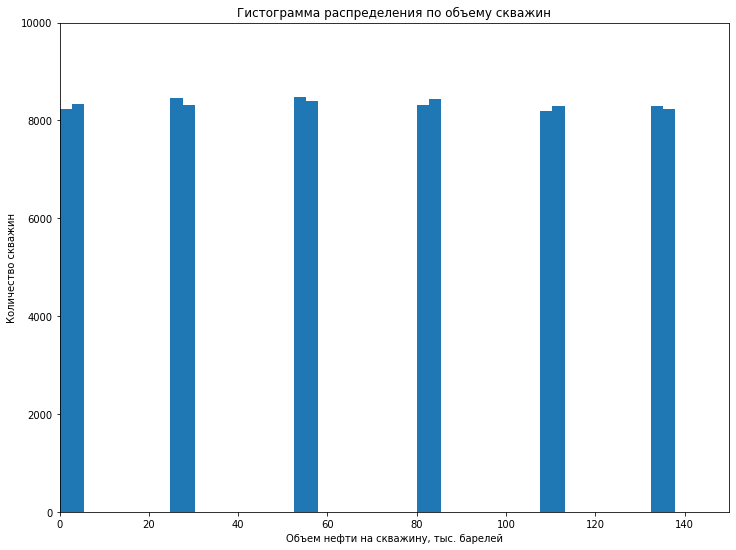

In [13]:
oil_hist(df_2['product'], 50, 150, 10000)

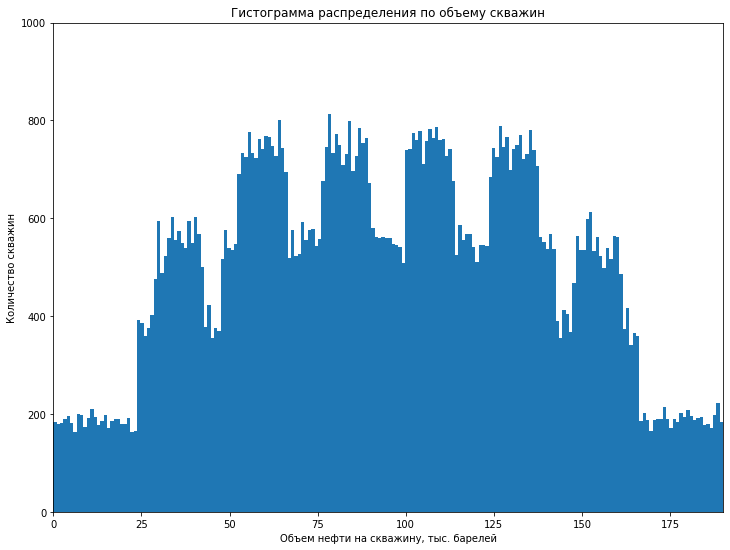

In [14]:
oil_hist(df_3['product'], 200, 190, 1000)

В данных отсутсвуют пропуски. Удалим из каждого датафрейма столбец id, так как он не несет значимости для для модели:

In [15]:
df_1 = df_1.drop(['id'], axis=1)
df_2 = df_2.drop(['id'], axis=1)
df_3 = df_3.drop(['id'], axis=1)

### Вывод

- Данные готовы к обучению

- Во втором месторождении около 8% месторождений не имело значения в столбце product. При сравнении с такими же значениями из первого и третьего региона можно понять, что были утеряны данные или не было исследовано количество барелей нефти

- По гистограммам можно понять, что у первого и третьего региона наспределение скважин близкое к нормальному. 

- Во втором регионе данные имеют странное распределение: от 0 до 5 баррелей с шагом по 15-20 равномерно распределены 100000 значений. Данные не подчиняются закону больших чисел и скорей всего были введены искуственно

## Обучение и проверка модели

Проверим качество модели линейной регрессии с текущим значением признаков и с масштабируемыми. Проверим эту гипотезу на df_1. Выполним разбивку неподготовленного датафрейма:

In [16]:
def test_split(df, target):
    features = df.drop([target] , axis=1)
    target = df[target]

    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=5)
    
    return features_train, features_valid, target_train, target_valid

In [17]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = test_split(df_1, 'product')

In [18]:
features_train_1.head()

,f0,f1,f2
35180,0.596589,-0.423122,-0.599284
80371,0.787058,-0.397987,6.681742
89979,0.889612,0.522944,3.227303
47271,-1.082876,0.382764,0.299522
35664,0.299153,-0.303998,-0.465922


- features - данные без масштаба
- features_s - данные с масштабом

In [19]:
def test_split_scaled(df, numeric, target):
    df_s = df.copy()

    features_s = df_s.drop([target] , axis=1)
    target_s = df_s[target]

    features_train_s, features_valid_s, target_train_s, target_valid_s = train_test_split(
        features_s, target_s, test_size=0.25, random_state=5062020)

    scaler = StandardScaler()
    scaler.fit(features_train_s[numeric])
    features_train_s[numeric] = scaler.transform(features_train_s[numeric])
    features_valid_s[numeric] = scaler.transform(features_valid_s[numeric])

    return features_train_s, features_valid_s, target_train_s, target_valid_s

Проведем обучение модели без измененных данных:

In [20]:
model = LinearRegression()

model.fit(features_train_1, target_train_1)
predicted_target_1 = model.predict(features_valid_1)
print('RMSE -', mean_squared_error(target_valid_1, predicted_target_1)**0.5)

RMSE - 37.80284530541535


Проверим параметр RMSE на маштабированных данных:

In [21]:
features_train_1s, features_valid_1s, target_train_1s, target_valid_1s = test_split_scaled(
                                                                        df_1, ['f0', 'f1', 'f2'], 'product')
model.fit(features_train_1s, target_train_1s)
predicted_target_1s = model.predict(features_valid_1s)
print('RMSE -', mean_squared_error(target_valid_1s, predicted_target_1s)**0.5)

RMSE - 37.401957199217094


Расссмотрим гипотезу на df_2 и df_3:

In [22]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = test_split(df_2, 'product')
model.fit(features_train_2, target_train_2)
predicted_target_2 = model.predict(features_valid_2)
print('RMSE -', mean_squared_error(target_valid_2, predicted_target_2)**0.5)

features_train_2s, features_valid_2s, target_train_2s, target_valid_2s = test_split_scaled(
                                                                        df_2, ['f0', 'f1', 'f2'], 'product')
model.fit(features_train_2s, target_train_2s)
predicted_target_2s = model.predict(features_valid_2s)
print('RMSE -', mean_squared_error(target_valid_2s, predicted_target_2s)**0.5)

RMSE - 0.8911637870714576
RMSE - 0.887425834257285


In [23]:
features_train_3, features_valid_3, target_train_3, target_valid_3 = test_split(df_3, 'product')
model.fit(features_train_3, target_train_3)
predicted_target_3 = model.predict(features_valid_3)
print('RMSE -', mean_squared_error(target_valid_3, predicted_target_3)**0.5)

features_train_3s, features_valid_3s, target_train_3s, target_valid_3s = test_split_scaled(
                                                                        df_3, ['f0', 'f1', 'f2'], 'product')
model.fit(features_train_3s, target_train_3s)
predicted_target_3s = model.predict(features_valid_3s)
print('RMSE -', mean_squared_error(target_valid_3s, predicted_target_3s)**0.5)

RMSE - 40.27855914124022
RMSE - 40.18553497171235


Масштабирование данных не требуется. Проверим показатель RMSE при других гиперпараметрах модели:

In [24]:
model = LinearRegression(normalize=True)
model.fit(features_train_1, target_train_1)
predicted_target_1 = model.predict(features_valid_1)
print('RMSE -', mean_squared_error(target_valid_1, predicted_target_1)**0.5)

RMSE - 37.80284530541535


In [25]:
model = LinearRegression(fit_intercept=False)
model.fit(features_train_1, target_train_1)
predicted_target_1 = model.predict(features_valid_1)
print('RMSE -', mean_squared_error(target_valid_1, predicted_target_1)**0.5)

RMSE - 61.30019459741266


Изменение стандартных значений гиперпараметров не улучшило модель. Произведем вывод предсказанного запаса с реальным и выведем RMSE:

In [26]:
model = LinearRegression()

def oil_predict(df, target_name):
    features = df.drop([target_name] , axis=1)
    target = df[target_name]
    
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=5)
    
    model.fit(features_train, target_train)
    predicted_target = model.predict(features_valid)
    data = {'real_product' : target_valid,
            'predicted_product' : predicted_target         
    }
    data_frame = pd.DataFrame(data, columns = ['real_product', 'predicted_product'])
    rmse = mean_squared_error(target_valid, predicted_target)**0.5
    mean = data_frame['predicted_product'].mean()
    oil_sum = data_frame['predicted_product'].sum()
    return data_frame, rmse, mean, oil_sum

In [27]:
df_1_predicted, df_1_rmse, df_1_predicted_mean, df_1_predicted_sum = oil_predict(df_1, 'product')

In [28]:
df_1_predicted.head()

,real_product,predicted_product
60743,119.220564,118.026686
33949,169.808150,110.858985
52805,131.589165,76.589517
11804,144.585224,100.990823
9229,184.075418,90.048812


In [29]:
print('RMSE -', df_1_rmse)
print('Средний запас запасанного сырья -', df_1_predicted_mean)

RMSE - 37.80284530541535
Средний запас запасанного сырья - 92.62394691552272


In [30]:
df_2_predicted, df_2_rmse, df_2_predicted_mean, df_2_predicted_sum = oil_predict(df_2, 'product')

In [31]:
df_2_predicted.head()

,real_product,predicted_product
60743,80.859783,80.991708
33949,53.906522,53.729323
52805,3.179103,3.751569
11804,107.813044,108.245842
9229,80.859783,82.008314


In [32]:
print('RMSE -', df_2_rmse)
print('Средний запас запасанного сырья -', df_2_predicted_mean)

RMSE - 0.8911637870714576
Средний запас запасанного сырья - 68.6475648923721


In [33]:
df_3_predicted, df_3_rmse, df_3_predicted_mean, df_3_predicted_sum = oil_predict(df_3, 'product')

In [34]:
df_3_predicted.head()

,real_product,predicted_product
60743,186.714538,88.685519
33949,73.641755,118.919701
52805,125.190694,98.429155
11804,130.826729,114.772869
9229,14.983400,54.375878


In [35]:
print('RMSE -', df_3_rmse)
print('Средний запас запасанного сырья -', df_3_predicted_mean)

RMSE - 40.27855914124022
Средний запас запасанного сырья - 95.02417827030403


Оценим общий запас на регион по предсказанным данным:

In [36]:
print('Суммарный предсказанный запас в позиции 1 -', df_1_predicted_sum)
print('Суммарный реальный запас в позиции 1 -', df_1_predicted['real_product'].sum())
print()
print('Суммарный предсказанный запас в позиции 2 -', df_2_predicted_sum)
print('Суммарный реальный запас в позиции 2 -', df_2_predicted['real_product'].sum())
print()
print('Суммарный предсказанный запас в позиции 3 -', df_3_predicted_sum)
print('Суммарный реальный запас в позиции 3 -', df_3_predicted['real_product'].sum())

Суммарный предсказанный запас в позиции 1 - 2315598.672888068
Суммарный реальный запас в позиции 1 - 2322579.7884419193

Суммарный предсказанный запас в позиции 2 - 1716189.1223093027
Суммарный реальный запас в позиции 2 - 1716031.8878765225

Суммарный предсказанный запас в позиции 3 - 2375604.456757601
Суммарный реальный запас в позиции 3 - 2377216.735320481


### Вывод

- Данные предсказаний о количестве нефти по сумме примерно совпадают по сумме с предсказанными значениями. Лучше всего модель предсказала запасы во втором регионе (RMSE - 0.88), далее в первом и третьем соотвественно.
- Возможно утеряные данные из второго региона сказались на модели и она достаточно сильно переобучилась. Но из-за утери данных и малого запаса в среднем на месторождение не имеет смысла рассматривать второе месторождение как прибыльное.
- Изучим все регионы на риски и прибыль, но в конечном итоге будем выбирать между 1 и 3 регионом

## Подготовка к расчёту прибыли

Создадим переменные об экономической информации:

In [37]:
budget = 1e+07
chosen_points = 500
best_points = 200
price_per_barrel = 450

Мы расчитываем прибыль в тысячах рублей за тысячу барелей, поэтому 1 милиард сохранен таким образом

Расчитаем безубыточную разработку сырья на 200 месторождениях. И найдем среднее количество продукта в месторождениях необходимое для этого:

In [38]:
average_profit_per_point = budget / best_points
print('Средняя прибыль на лучшую точку -', average_profit_per_point, 'тыс.руб.')

Средняя прибыль на лучшую точку - 50000.0 тыс.руб.


In [39]:
average_barrels_per_point = average_profit_per_point  / price_per_barrel
print('Средний объем нефти на точку -',average_barrels_per_point, 'тыс. барелей')

Средний объем нефти на точку - 111.11111111111111 тыс. барелей


In [40]:
average_barrels = budget / price_per_barrel
print('Средний объем нефти на регион -',average_barrels, 'тыс. барелей')

Средний объем нефти на регион - 22222.222222222223 тыс. барелей


In [41]:
print('Средний запас фактичекой нефти на скважину в регионе 1', df_1['product'].mean())
print('Средний запас фактичекой нефти на скважину в регионе 2', df_2['product'].mean())
print('Средний запас фактичекой нефти на скважину в регионе 3', df_3['product'].mean())

Средний запас фактичекой нефти на скважину в регионе 1 92.50000000000001
Средний запас фактичекой нефти на скважину в регионе 2 68.82500000000002
Средний запас фактичекой нефти на скважину в регионе 3 95.00000000000004


Создадим функцию для расчета приыли на 500 разведанных точек:

In [42]:
def oil_profit_calc(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return price_per_barrel * selected.sum() - budget

Выведем распределение предсказанных значений:

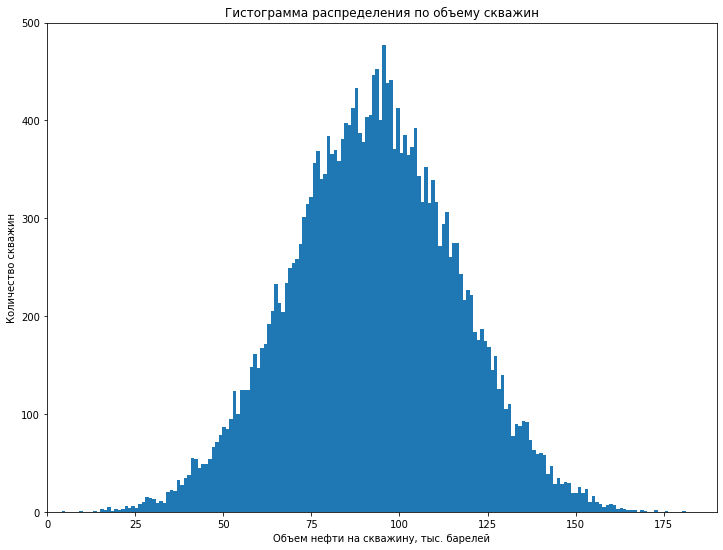

In [43]:
oil_hist(df_1_predicted['predicted_product'], 200, 190, 500)

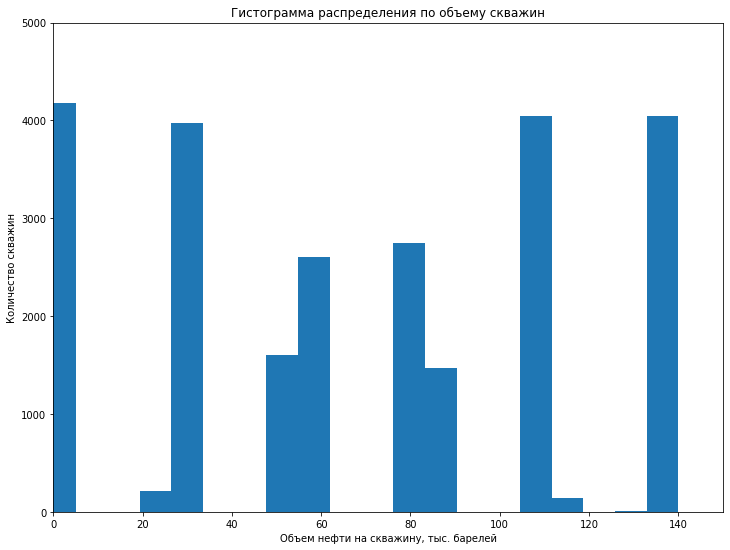

In [44]:
oil_hist(df_2_predicted['predicted_product'], 20, 150, 5000)

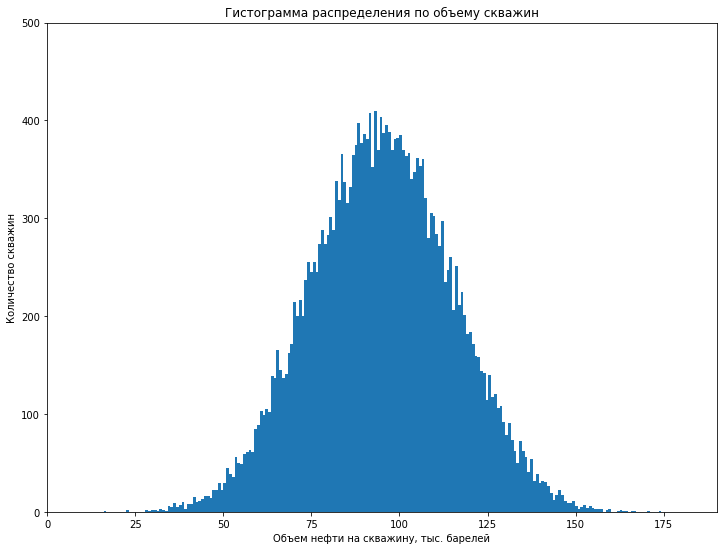

In [45]:
oil_hist(df_3_predicted['predicted_product'], 200, 190, 500)

### Вывод

- Была подготовлена средняя оценка прибыли за скважину и средний объем на скважину.
- Создана функция по расчету прибыли.

**Анализ средних объемов на скважину для каждого региона следующий (изучены средние фактические запасы)**:

- Для первого и третьего - высокая вероятность окупить затраты. Разброс значений вокруг среднего 92.5 и 95 говорит нам о том, что существует достаточно много скважин, где запасы больше необходимого среднего

- Во вторых данных возможно и есть определенный смысл - значений больше 111 (т.е достаточно много) и при определенной доли везения можно выбрать только лучшие в этой выборке (хотя среднее значение 68.8)

## Расчёт прибыли и рисков 

Напишем функцию:

In [75]:
state = np.random.RandomState(5)
def bootstrap_1000(target, probs):
    values=[]
    lost = 0
    for i in range(1000):
        target_sample = target.sample(replace=True, random_state=state, n=chosen_points)
        probs_sample = probs[target_sample.index]
        profit = oil_profit_calc(target, probs_sample, best_points)
        if profit < 0:
            lost +=1
        values.append(profit)
    
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    average = values.mean()
    risk = lost / 1000
    return average, lower, upper, risk

Теперь используем данные получившейся функции в наших датасетах:

In [76]:
average_1, lower_1, upper_1, risk_1 = bootstrap_1000(df_1_predicted['real_product'], 
                                                     df_1_predicted['predicted_product'])

In [86]:
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_1))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_1, upper_1))
print('Процент риска {:.2%}'.format(risk_1))

Средняя прибыль по региону = 457194.86 тыс.руб.
95% доверительный интервал от -75265.84 до 957514.50 тыс.руб.
Процент риска 4.30%


In [78]:
average_2, lower_2, upper_2, risk_2 = bootstrap_1000(df_2_predicted['real_product'], 
                                                     df_2_predicted['predicted_product'])

In [85]:
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_2))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_2, upper_2))
print('Процент риска {:.2%}'.format(risk_2))

Средняя прибыль по региону = 423523.86 тыс.руб.
95% доверительный интервал от 40418.36 до 810180.17 тыс.руб.
Процент риска 1.30%


In [80]:
average_3, lower_3, upper_3, risk_3 = bootstrap_1000(df_3_predicted['real_product'], 
                                                     df_3_predicted['predicted_product'])

In [87]:
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_3))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_3, upper_3))
print('Процент риска {:.2%}'.format(risk_3))

Средняя прибыль по региону = 322245.06 тыс.руб.
95% доверительный интервал от -197408.50 до 878417.19 тыс.руб.
Процент риска 11.90%


### Вывод

**Данные по первому региону**:
- Средняя прибыль по региону = 457194.86 тыс.руб.
- 95% доверительный интервал от -75265.84 до 957514.50 тыс.руб.
- Процент риска 4.30%

**Данные по второму региону**:
- Средняя прибыль по региону = 423523.86 тыс.руб.
- 95% доверительный интервал от 40418.36 до 810180.17 тыс.руб.
- Процент риска 1.30%

**Данные по третьему региону**:
- Средняя прибыль по региону = 322245.06 тыс.руб.
- 95% доверительный интервал от -197408.50 до 878417.19 тыс.руб.
- Процент риска 11.90%

## Общий вывод

**Данные были обработаны, рассчитаны прибыль, интервал и риски**:

**Первый регион**:
- Средняя прибыль по региону = 457194.86 тыс.руб.
- 95% доверительный интервал от -75265.84 до 957514.50 тыс.руб.
- Процент риска 4.30%

**Второй регион**:
- Средняя прибыль по региону = 423523.86 тыс.руб.
- 95% доверительный интервал от 40418.36 до 810180.17 тыс.руб.
- Процент риска 1.30%

**Третий регион**:
- Средняя прибыль по региону = 322245.06 тыс.руб.
- 95% доверительный интервал от -197408.50 до 878417.19 тыс.руб.
- Процент риска 11.90%

***Итог***:
- Мы отсеиваем третий регион, так как у этого региона нибольший процент риска - 11.9%
- Остаются два региона - первый (процент риска 4.3%) и второй (процент риска 1.3%)
- У второго региона наименьший % риска и, кроме того, доверительный интервал показывает, что даже при не очень удачном выборе разработка скважин окупится, так что лучше выбрать его.